Importing pandas and numpy for manipulating data.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


Viewing data
Replacing the question mark in age and fare column with numpy NaN value.

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})


Using seaborn and matplotlib to view how certain columns of the dataset relate to survivability.

<Axes: xlabel='survived', ylabel='fare'>

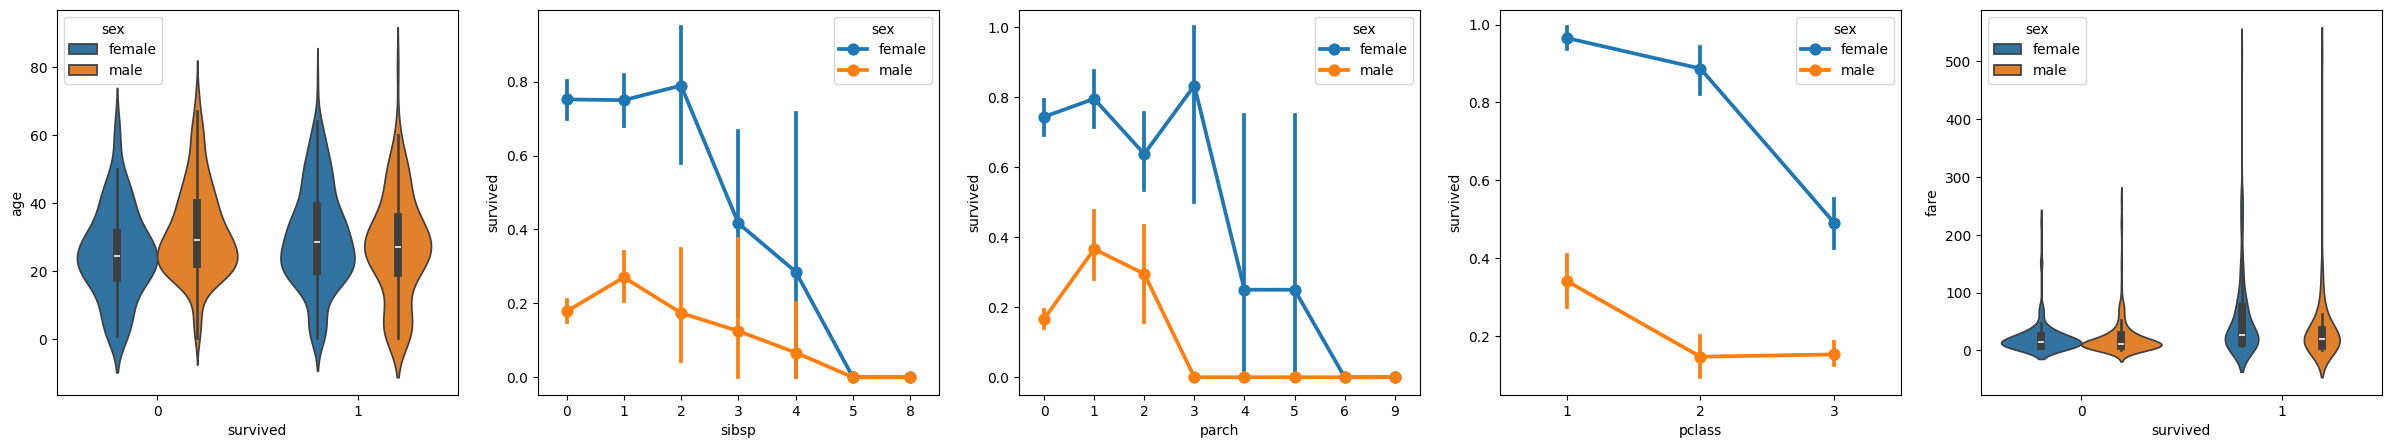

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


Converting relationships between survivals string values to integers.

In [4]:
data.replace({'male': 1, 'female': 0}, inplace=True)


C:\Users\tasbi\AppData\Local\Temp\ipykernel_4016\761646214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


Analyzing the input variables to identify the features that would be th best input to a machine learning model.

In [5]:
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Creating a new variable and column in dataset to check the correaltion again.

In [6]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


Dropping low value columns and rows with NaN values, to end up with a dataset that can be used to training a model.

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


Using sci-kit learn library to split the data into training and test data.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)


Scaling the input values.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


Using  Naïve Bayes algorithm to model the data.

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Predicting the outcome of the test data and calculating the accuracy of the test data.

In [11]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


The trained algorithm had a 75% success rate at testing survival.